# 파이썬을 이용한  웹 데이터 수집

#### 웹 데이터 수집 방법

- 데이터 제공 사이트에서 파일로 다운로드
- 크롤링(스크래핑)을 통한 수집
- 오픈API를 이용하여 수집

## 1. 웹 크롤링(Web Crawling)

### 웹 크롤링 개념

- 웹의 정보를 자동으로 수집하는 것
- 웹 크롤러(crawler) :  웹의 정보를 수집하기 위해 만든 프로그램
- 웹 페이지의 링크를 통해 계속해서 정보를 찾아 나감
    - 중복된 데이트 수집이 될 수 있으므로 중복된 데이터 처리가 필수

- 웹 스크래핑(scrapping) : 특정 웹 사이트에서만 데이터를 추적(수집)

### 웹 크롤링의 활용 예

- 기업의 경우 웹 크롤링 과정을 통해 고객과 제품의 정보를 다양한 소셜미디어 플랫폼에서 웹 크롤링을 통해 정보를 수집하고 브랜드 성과와 고객 만족도를 파악
- 주식시장 : 웹 크롤링을 통해 다양한 플랫폼에서 원하는 기간의 주가 데이터 수집하여 트렌드 발견 및 미래 주가 예측 모델에 활용
- 부동산 시장 : 부동산 가격 예측과 책정에 활용
    - 미국의 부동산 거래 플랫폼 질로우(zillow) : 웹 크롤링을 통해 정보를 수집하여 부동산 가격을 평가
        - https://zillow.com

### 웹 크롤링 허용 문제

- 모든 사이트는 웹 크롤링 권한에 관해 명시한 페이지가 존재함
- robots.txt 파일 : 크롤링을 위한 규칙 명시한 페이지
- 사이트 URL 끝에 robots.txt 를 붙이면 크롤링 권한에 관한 내용 확인

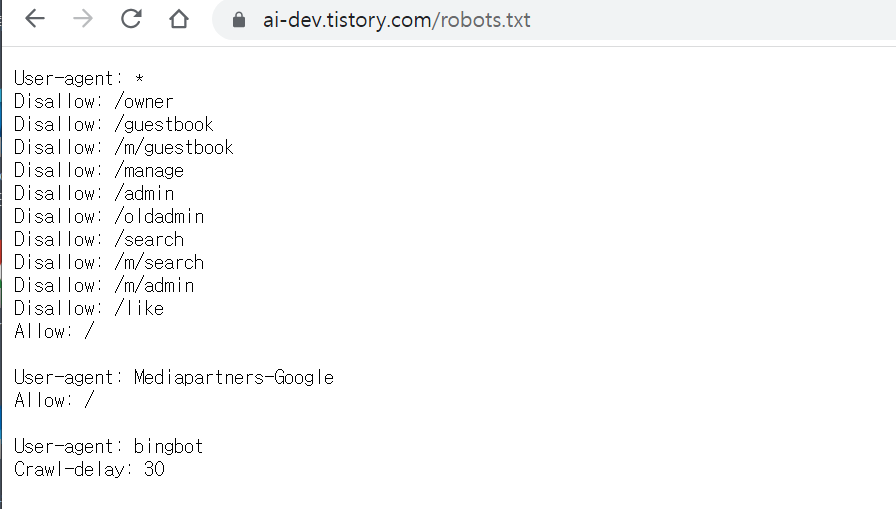

- 'Disallow' : 크롤링 허용하지 않는 경로
- 'Allow' : 크롤링 허용 경로

#### 예. http://www.google.com/robots.txt

- 크롤링 전에 항상 robots.txt 파일을 확인할 것

----

## 2. 파이썬을 이용한  웹 크롤링

## 2.1 웹크롤링 준비

#### 크롤링하는 웹사이트 살펴보기

- http://www.naver.com

### 기본 모듈 임포트

In [2]:
import requests

### requests 모듈
- Python에서 HTTP 요청을 보내는 모듈
- URL 주소에 있는 내용을 요청할 때 사용
    - HTTP request types: GET, PUT, DELETE, HEAD and OPTIONS

- https://requests.readthedocs.io/en/latest/
- https://requests.readthedocs.io/en/latest/user/quickstart/
- https://requests.readthedocs.io/en/latest/api/

#### requests 모듈의 get() 함수

형식 : request(method, url, **kwargs)
    
- 지정된 url을 요청하면 response 객체 반환

In [16]:
url = 'https://www.naver.com'
response = requests.get(url)

#### response 객체의 필드들

response 객체의 필드 : status-code 
- Integer Code of responded HTTP Status
- 예.404 or 200

In [15]:
response.status_code

200

response 객체의 필드 : headers

In [11]:
response.headers

{'Date': 'Wed, 13 Mar 2024 05:25:16 GMT', 'content-type': 'text/html; charset=UTF-8', 'transfer-encoding': 'chunked', 'set-cookie': 'PM_CK_loc=c70532124bb0353d5f685d6f4cde9b15403284f85cc66c6998e108d0c5ab4055; Expires=Thu, 14 Mar 2024 05:25:16 GMT; Path=/; HttpOnly', 'cache-control': 'no-cache, no-store, must-revalidate', 'pragma': 'no-cache', 'x-frame-options': 'DENY', 'x-xss-protection': '1; mode=block', 'content-encoding': 'gzip', 'strict-transport-security': 'max-age=63072000; includeSubdomains', 'referrer-policy': 'unsafe-url', 'server': 'nfront'}

In [17]:
response.headers['Date']

'Wed, 13 Mar 2024 05:27:01 GMT'

In [18]:
response.headers['content-type']

'text/html; charset=UTF-8'

response 객체의 필드 : encoding

In [12]:
response.encoding

'UTF-8'

response 객체의 필드 : text
- 브라우저가 사이트에 요청해서 받은 결과와 같은 결과

In [19]:
# response.text

##### 예1.

request모듈의 get()을 이용하여 http://www.tistory.com 사이트 메인페이지 요청

In [28]:
url = 'http://www.tistory.com/'
response = requests.get(url)
response.status_code
print(f'상태코드: {response.status_code}')

상태코드: 200


##### 예2.

request모듈의 get()을 이용하여 https://www.google.co.kr 사이트 메인페이지 요청

In [23]:
url = 'https://www.google.co.kr/' 
response = requests.get(url)
response.status_code

200

#### 파라미터 전달 : requests.get(URL, params= {} )

- 파라미터란? : 사이트의 문서를 요청할 때 서버로 전달되는 정보
- 함수의 파라미터 처럼 문서를 찾기위한 정보나 명령을 수행하기 위한 정보를 같이 전달하게 되는데 그 정보를 파라미터라고 함    

- https://sports.news.naver.com/news?oid=144&aid=0000948747


- params = {'param1': 'value1', 'param2': 'value'}
- res = requests.get(URL, params=params)

In [29]:
url = 'https://sports.news.naver.com/news' 
params ={'oid':'144', 'aid':'0000948747'}
response = requests.get(url, params)
print(f'상태코드: {response.status_code}')

상태코드: 200


In [32]:
# print(response.text)

In [31]:
response.text[:100]

'<!DOCTYPE html>\n<html lang="ko">\n<head>\n\t<meta charset="UTF-8">\n\t<meta http-equiv="X-UA-Compatible" '

## 2.2 웹크롤링

### 데이터 수집을 위한 절차

1. 문서 내용 읽어오기
    - **urllib.request 패키지** 사용 :
        - url을 넘겨주면 데이터를 텍스트 형태로 반환(기본 내장 패키지)
        - urlopen() : url 접속
        - read() : 데이터 읽어오기
        - text 속성을 사용해서 데이터 읽어올 수도 있음 
    

2. 문서에서 원하는 내용 추출하기(파싱)  
    - **BeautifulSoup 패키지** 사용
    - find() / findAll() 함수 사용

### ① 웹페이지 데이터 가져오기

### urllib 모듈

- 웹에서 얻은 데이터를 다루는 파이썬 패키지
- 총 4개의 모듈로 구성
    - urllib.request : opening and reading URLs
    - urllib.error : containing the exceptions raised by urllib.request
    - urllib.parse : parsing URLs
    - urllib.robotparser : parsing robots.txt files
    
    
- https://docs.python.org/3/library/urllib.html

### urllib.request

- 웹문서를 열어 데이터를 읽어오는 모듈
- higher-level HTTP client interface.


- https://docs.python.org/3/library/urllib.request.html

#### 웹 데이터를 다루기 위한 모듈 임포트

In [33]:
from urllib.request import urlopen

#### urllib.request.urlopen() 함수

- Open the URL url, which can be either a string or a Request object
- 
urllib.request.urlopen(url, data=None, [timeout, ]*, cafile=None, capath=None, cadefault=False, context=None)


In [36]:
url = 'https://www.naver.com'

response = urlopen(url)
response

- HTTPResponse 객체에서 소스 코드 읽기 : read()

In [38]:
# response.read()

### ② 원하는 내용 추출하기(parsing)  

- html 문서에서 필요한 내용만 추출
- **BeautifulSoup** 라이브러리 사용
- find() / findAll() 등 함수 사용

### BeautifulSoup

- 데이터를 추출하는데 필요한 기능이 들어 있는 라이브러리 (파싱 라이브러리)
- 외부 라이브러리
- https://beautiful-soup-4.readthedocs.io/en/latest/
- https://www.crummy.com/software/BeautifulSoup/bs4/doc/

#### BeautifulSoup 패키지 설치

In [ ]:
# !pip install beautifulsoup4

- 파이참 설치방법
    - File/Settings
    - Project Interpreter에서 bs4 검색
    - [Install Package]

In [39]:
import bs4
bs4.__version__

'4.12.2'

In [40]:
url = 'https://www.naver.com'

response = urlopen(url)

#### bs4 파싱 객체 생성하기

- BeautifulSoup 패키지 임포트

In [41]:
from bs4 import BeautifulSoup

- BeautifulSoup(접속객체, 파서기)

In [42]:
soup = BeautifulSoup(response, 'html.parser')
soup

 <!DOCTYPE html>
 <html class="fzoom" lang="ko"> <head> <meta charset="utf-8"/> <meta content="origin" name="Referrer"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <title>NAVER</title> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 

In [43]:
type(soup)

bs4.BeautifulSoup

- prettify()
    - 들여쓰기, 계층적인 구조로 출력
    - 가독성 높음

In [45]:
print(soup.prettify())

<!DOCTYPE html>
<html class="fzoom" lang="ko">
 <head>
  <meta charset="utf-8"/>
  <meta content="origin" name="Referrer"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=1190" name="viewport"/>
  <title>
   NAVER
  </title>
  <meta content="NAVER" name="apple-mobile-web-app-title">
   <meta content="index,nofollow" name="robots">
    <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
     <meta content="네이버" property="og:title"/>
     <meta content="https://www.naver.com/" property="og:url"/>
     <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
     <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
      <meta content="summary" name="twitter:card"/>
      <meta content="" name="twitter:title"/>
      <meta content="https://www.naver.com/" name="twitter:url"/>
      <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_

### 특정 태그에서 텍스트 추출하기

: BeautifulSoup의 find(), find_all(), findAll() 메서드 사용
- find(name, attrs, recursive, string, **kwargs)
- find_all(name, attrs, recursive, string, limit, **kwargs)

##### find() 메서드

- find(name, attrs, recursive, string, **kwargs)
    - attrs : {"속성":"값"}
- 찾은 태그의 첫번째 태그 반환

In [49]:
#예제1. HTML 문서
html_str = '<html><head></head><body><div>Hello</div></body></html>'

soup = BeautifulSoup(html_str, 'html.parser')
print(soup)
type(soup)

<html><head></head><body><div>Hello</div></body></html>


bs4.BeautifulSoup

In [50]:
result = soup.find('div')
print(result)
print(type(result))

<div>Hello</div>
<class 'bs4.element.Tag'>


- find().text : 찾은 태그의 텍스트 가져오기

In [53]:
result.text

'Hello'

In [54]:
soup.find('div').text

'Hello'

##### find_all() 메서드

- find_all(name, attrs, recursive, string, **kwargs)
    - attrs : {"속성":"값"}
- 기준에 맞는 태그를 모두 가져옴
- 리스트 타입을 반환

In [58]:
html_str = """
<html>
    <body>
        <!-- 예. 찾은 태그들의 모든 text 가져오기 -->
        <ul>
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
    </body>
</html>
"""

In [59]:
soup = BeautifulSoup(html_str, 'html.parser')

In [60]:
soup.find('ul')

<ul>
<li>hello</li>
<li>bye</li>
<li>welcome</li>
</ul>

In [61]:
soup.find('li')

<li>hello</li>

In [62]:
soup.find_all('li')

[<li>hello</li>, <li>bye</li>, <li>welcome</li>]

In [65]:
soup.findAll('li')

[<li>hello</li>, <li>bye</li>, <li>welcome</li>]

In [67]:
soup.findAll('li')[0] #index로 불러오기

<li>hello</li>

In [66]:
lis = soup.findAll('li')

for li in lis:
    print(li)

<li>hello</li>
<li>bye</li>
<li>welcome</li>


In [68]:
lis = soup.findAll('li')

for li in lis:
    print(li.text)

hello
bye
welcome


#### 해당 태그의 class 속성을 기준으로 찾기

In [69]:
html_str = """
<html>
    <body>
        <ul class="greet">
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
        <ul class="reply">
            <li>ok</li>
            <li>no</li>
            <li>sure</li>
        </ul>
    </body>
</html>
"""

In [72]:
soup = BeautifulSoup(html_str, 'html.parser')

In [85]:
soup.find('ul', {'class' :'reply'})

<ul class="reply">
<li>ok</li>
<li>no</li>
<li>sure</li>
</ul>

In [86]:
rep = soup.find('ul', {'class' :'reply'})
print(rep.text)


ok
no
sure



In [82]:
for li in soup.findAll('li'):
    print(li.text)

hello
bye
welcome
ok
no
sure


#### 해당 태그의 id 속성을 기준으로 찾기

In [157]:
# html_str = """
# <html>
#     <body>
#         <h1 id='title'>Hello Python</h1>
#         <p id="crawling">웹 크롤링</p>
#         <p id="parsing">파싱</p>
#     </body>
# </html>
# """

In [111]:
soup = BeautifulSoup(html_str, 'html.parser')

In [90]:
result = soup.find('p', {'id':'parsing'})
result

<p id="parsing">파싱</p>

------

In [172]:
html_str = """
<html>
    <head><title>크롤링예제</title></head>
    <body>
        <h1>파이썬 프로그래밍</h1>
        <p>웹 페이지 분석</p>
        <p>크롤링</p>
        <p>파싱</p>        
    </body>
</html>
"""

In [171]:
soup = BeautifulSoup(html_str, 'html.parser')

### 태그 이름 사용하여 찾기

: .태그명

- .title
- .head
- .body
- .p

#### title 태그 찾기

In [173]:
soup.title

<title>크롤링예제</title>

#### head 태그 찾기

In [174]:
soup.head

<head><title>크롤링예제</title></head>

#### body 태그 찾기

In [175]:
soup.body

<body>
<h1>파이썬 프로그래밍</h1>
<p>웹 페이지 분석</p>
<p>크롤링</p>
<p>파싱</p>
</body>

In [176]:
soup.p

<p>웹 페이지 분석</p>

### 형제, 부모, 자식(자손) 태그 찾기

- 속성 :
    - .children, .contents
    - .next_sibling, .next_siblings
    - .previous_sibling, .previous_siblings
    - .parent, .parents
    
    
- 메서드 : 
    - find_next_siblings(name, attrs, string, limit, **kwargs)
    - find_next_sibling(name, attrs, string, **kwargs)
    - find_previous_sibling(name, attrs, string, **kwargs)
    - find_previous_siblings(name, attrs, string, limit, **kwargs)
    - find_parent(name, attrs, string, **kwargs)
    - find_parents(name, attrs, string, limit, **kwargs)

#### 태그의 자손 태그 찾기 : .contents, .children

In [177]:
soup.body

<body>
<h1>파이썬 프로그래밍</h1>
<p>웹 페이지 분석</p>
<p>크롤링</p>
<p>파싱</p>
</body>

In [178]:
soup.body.contents

['\n',
 <h1>파이썬 프로그래밍</h1>,
 '\n',
 <p>웹 페이지 분석</p>,
 '\n',
 <p>크롤링</p>,
 '\n',
 <p>파싱</p>,
 '\n']

In [179]:
list(soup.body.children)

['\n',
 <h1>파이썬 프로그래밍</h1>,
 '\n',
 <p>웹 페이지 분석</p>,
 '\n',
 <p>크롤링</p>,
 '\n',
 <p>파싱</p>,
 '\n']

In [180]:
for child in soup.body.children:
    print(child)



<h1>파이썬 프로그래밍</h1>


<p>웹 페이지 분석</p>


<p>크롤링</p>


<p>파싱</p>




#### 형제 태그 찾기 : **.next_sibling**, **.next_siblings**

In [181]:
soup.find('p')

<p>웹 페이지 분석</p>

In [182]:
soup.findAll('p')

[<p>웹 페이지 분석</p>, <p>크롤링</p>, <p>파싱</p>]

In [169]:
#soup.find('p').next_sibling

In [183]:
soup.find('p').next_sibling.next_sibling

<p>크롤링</p>

In [184]:
soup.find('p').next_siblings

<generator object PageElement.next_siblings at 0x107d08e80>

In [185]:
for ns in soup.find('p').next_siblings:
    print(ns)



<p>크롤링</p>


<p>파싱</p>




#### 형제 태그 찾기2 :  .previous_sibling, .previous_siblings

In [186]:
soup.find('p').previous_sibling

'\n'

In [187]:
soup.find('p').previous_sibling.previous_sibling

<h1>파이썬 프로그래밍</h1>

#### 부모 태그 찾기 : **.parent**,  **.parents**

In [188]:
soup.find('p').parent

<body>
<h1>파이썬 프로그래밍</h1>
<p>웹 페이지 분석</p>
<p>크롤링</p>
<p>파싱</p>
</body>

In [190]:
soup.find('body').parent

<html>
<head><title>크롤링예제</title></head>
<body>
<h1>파이썬 프로그래밍</h1>
<p>웹 페이지 분석</p>
<p>크롤링</p>
<p>파싱</p>
</body>
</html>

In [192]:
for parent in soup.find('h1').parents:
    print(parent)

<body>
<h1>파이썬 프로그래밍</h1>
<p>웹 페이지 분석</p>
<p>크롤링</p>
<p>파싱</p>
</body>
<html>
<head><title>크롤링예제</title></head>
<body>
<h1>파이썬 프로그래밍</h1>
<p>웹 페이지 분석</p>
<p>크롤링</p>
<p>파싱</p>
</body>
</html>

<html>
<head><title>크롤링예제</title></head>
<body>
<h1>파이썬 프로그래밍</h1>
<p>웹 페이지 분석</p>
<p>크롤링</p>
<p>파싱</p>
</body>
</html>



In [194]:
for parent in soup.find('h1').parents:
    print(parent.name)

body
html
[document]


In [193]:
for parent in soup.find('h1').parents:
    if parent is None:
        print(parent)
    else:
        print(parent.name)

body
html
[document]


### 다음/이전 태그 찾기 

- find_all_next(name, attrs, string, limit, **kwargs)
- find_next(name, attrs, string, **kwargs)
- find_all_previous(name, attrs, string, limit, **kwargs)
- find_previous(name, attrs, string, **kwargs

###  태그의 속성값 추출하기

- a 태그의 href 속성

In [242]:
html_str = """
<html>
    <body>
        <ul class="ko">
            <li><a href="https://www.naver.com/">네이버</a></li>
            <li><a href="https://www.daum.net/">다음</a></li>
        </ul>
        <ul class="sns">
            <li><a href="https://www.goole.com/">구글</a></li>
            <li><a href="https://www.facebook.net/">페이스북</a></li>
        </ul>
    </body>
</html>
"""

In [243]:
soup = BeautifulSoup(html_str, 'html.parser')

In [244]:
a1 = soup.find('a')

In [245]:
a1.text

'네이버'

In [246]:
result = soup.find('ul', class_='sns')
result

<ul class="sns">
<li><a href="https://www.goole.com/">구글</a></li>
<li><a href="https://www.facebook.net/">페이스북</a></li>
</ul>

In [209]:
soup.findAll('a')

[<a href="https://www.naver.com/">네이버</a>,
 <a href="https://www.daum.net/">다음</a>,
 <a href="https://www.goole.com/">구글</a>,
 <a href="https://www.facebook.net/">페이스북</a>]

In [213]:
for a in soup.findAll('a'):
    print(a['href'])

https://www.naver.com/
https://www.daum.net/
https://www.goole.com/
https://www.facebook.net/


In [212]:
links =[]
for a in soup.findAll('a'):
    links.append(a['href'])
links

['https://www.naver.com/',
 'https://www.daum.net/',
 'https://www.goole.com/',
 'https://www.facebook.net/']

### select() 메서드를 사용하여 찾기

In [249]:
html_str = """
<html>
   <body>
        <div id="wrap">
            <div id="mainMenuBox">
                <ul>  
                    <li><a href="#">패션잡화</a></li>    
                    <li><a href="#">주방용품</a></li>         
                    <li><a href="#">생활건강</a></li>
                    <li><a href="#">DIY가구</a></li>
                </ul>
            </div>
            <div>
                <table>
                    <tr>
                        <td><img src="shoes1.jpg"></td>
                        <td><img src="shoes2.jpg"></td>
                        <td><img src="shoes3.jpg"></td></tr>
                    <tr id="prdName">
                        <td>솔로이스트<br>걸리쉬 리본단화</td>
                        <td>맥컬린<br>그레이가보시스트랩 펌프스</td>
                        <td>맥컬린<br>섹슈얼인사이드펌프스</td></tr>
                    <tr id="price">
                        <td>100,000원</td><td>200,000원</td><td>120,000원</td></tr>
                </table>
            </div>
            <div id="out_box">
                <div class="box">
                    <h4>공지사항</h4>
                    <hr>
                    <a href="#">[배송] : 무표배송 변경 안내 18.10.20</a><br>
                    <a href="#">[전시] : DIY 가구 전시 안내 18.10.31</a><br>
                    <a href="#">[판매] : 11월 특가 상품 안내 18.11.05</a>                               
                </div>
                <div class="box">
                    <h4>커뮤니티</h4>
                    <hr>
                    <a href="#">[레시피] : 살 안찌는 야식 만들기</a><br>
                    <a href="#">[가구] : 헌집 새집 베스트 가구</a><br>
                    <a href="#">[후기] : 배송이 잘못 됐어요 ㅠㅠ</a><br>
                 </div>
            </div>            
        </div>
    </body>
</html>"""

In [250]:
soup = BeautifulSoup(html_str, 'html.parser')

- select(태그명[속성])

In [219]:
soup.select('a[href]')

[<a href="#">패션잡화</a>,
 <a href="#">주방용품</a>,
 <a href="#">생활건강</a>,
 <a href="#">DIY가구</a>,
 <a href="#">[배송] : 무표배송 변경 안내 18.10.20</a>,
 <a href="#">[전시] : DIY 가구 전시 안내 18.10.31</a>,
 <a href="#">[판매] : 11월 특가 상품 안내 18.11.05</a>,
 <a href="#">[레시피] : 살 안찌는 야식 만들기</a>,
 <a href="#">[가구] : 헌집 새집 베스트 가구</a>,
 <a href="#">[후기] : 배송이 잘못 됐어요 ㅠㅠ</a>]

In [225]:
for list in soup.select('a[href]'):
    print(list.text)

패션잡화
주방용품
생활건강
DIY가구
[배송] : 무표배송 변경 안내 18.10.20
[전시] : DIY 가구 전시 안내 18.10.31
[판매] : 11월 특가 상품 안내 18.11.05
[레시피] : 살 안찌는 야식 만들기
[가구] : 헌집 새집 베스트 가구
[후기] : 배송이 잘못 됐어요 ㅠㅠ


- select(아이디선택자)

In [226]:
soup.select('#mainMenuBox')

[<div id="mainMenuBox">
 <ul>
 <li><a href="#">패션잡화</a></li>
 <li><a href="#">주방용품</a></li>
 <li><a href="#">생활건강</a></li>
 <li><a href="#">DIY가구</a></li>
 </ul>
 </div>]

In [227]:
soup.select('#out_box')

[<div id="out_box">
 <div class="box">
 <h4>공지사항</h4>
 <hr/>
 <a href="#">[배송] : 무표배송 변경 안내 18.10.20</a><br/>
 <a href="#">[전시] : DIY 가구 전시 안내 18.10.31</a><br/>
 <a href="#">[판매] : 11월 특가 상품 안내 18.11.05</a>
 </div>
 <div class="box">
 <h4>커뮤니티</h4>
 <hr/>
 <a href="#">[레시피] : 살 안찌는 야식 만들기</a><br/>
 <a href="#">[가구] : 헌집 새집 베스트 가구</a><br/>
 <a href="#">[후기] : 배송이 잘못 됐어요 ㅠㅠ</a><br/>
 </div>
 </div>]

- select(클래스선택자)

In [228]:
soup.select('.box')

[<div class="box">
 <h4>공지사항</h4>
 <hr/>
 <a href="#">[배송] : 무표배송 변경 안내 18.10.20</a><br/>
 <a href="#">[전시] : DIY 가구 전시 안내 18.10.31</a><br/>
 <a href="#">[판매] : 11월 특가 상품 안내 18.11.05</a>
 </div>,
 <div class="box">
 <h4>커뮤니티</h4>
 <hr/>
 <a href="#">[레시피] : 살 안찌는 야식 만들기</a><br/>
 <a href="#">[가구] : 헌집 새집 베스트 가구</a><br/>
 <a href="#">[후기] : 배송이 잘못 됐어요 ㅠㅠ</a><br/>
 </div>]

In [235]:
soup.select('.box')[1].select('a')[0].text

'[레시피] : 살 안찌는 야식 만들기'

In [236]:
soup.select('.box')[1].select('a')[0]['href']

'#'

In [240]:
soup.select('#out_box > div:nth-of-type(1)')

[<div class="box">
 <h4>공지사항</h4>
 <hr/>
 <a href="#">[배송] : 무표배송 변경 안내 18.10.20</a><br/>
 <a href="#">[전시] : DIY 가구 전시 안내 18.10.31</a><br/>
 <a href="#">[판매] : 11월 특가 상품 안내 18.11.05</a>
 </div>]

In [251]:
#nth-of-type(n) : n번째 요소들을 다 가지고 옴
soup.select('.box a:nth-of-type(1)')

[<a href="#">[배송] : 무표배송 변경 안내 18.10.20</a>,
 <a href="#">[레시피] : 살 안찌는 야식 만들기</a>]

-----

#### [정리] 크롤링 단계

1. 크롤링하려는 HTML 페이지의 구조와 코드 살펴보기
    - F12 (개발자도구) : URL주소, 태그 확인
2. 문서 내용 읽어오기 : 
    - html = urllib.request.urlopen(URL주소).read()
3. 원하는 내용 추출하기(parsing)
    - soup = bs4.BeautifulSoup(html, 'html.parser')
    - soup.find_all(찾아낼태그)

----